# Question 1

In [1]:
# STEP 1
import pandas as pd

In [2]:
# STEP 2 & 3
users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [5]:
pip install --upgrade pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/97/d8/dc2f6bff06a799a5603c414afc6de39c6351fe34892d50b6a077df3be6ac/pandas-2.1.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 660.6 kB/s eta 0:00:17
   ---------------------------------------- 0.1/10.6 MB 1.2 MB/s eta 0:00:09
   - -------------------------------------- 0.5/10.6 MB 3.7 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/10.6 MB 6.2 MB/s eta 0:00:02
   ------- -------------------------------- 1.9/10.6 MB 8.2 MB/s eta 0:00:02
   ---------- ----------------------------- 2.8/10.6 MB 10.1 MB/s eta 0:00:01
   ------------- -------------------------- 3.7/10.6 MB 11.2 MB/s eta 0:00:01
   ----------------- ---------------------- 4.5/10.6 MB 12.0 MB/s eta 0:00:01
   -------------------- ---------

In [10]:
# STEP 4-5
males_only = users[users['gender'] == 'M']
print(males_only)

     user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
2          3   23      M         writer    32067
3          4   24      M     technician    43537
5          6   42      M      executive    98101
6          7   57      M  administrator    91344
..       ...  ...    ...            ...      ...
935      936   24      M          other    32789
936      937   48      M       educator    98072
939      940   32      M  administrator    02215
940      941   20      M        student    97229
942      943   22      M        student    77841

[670 rows x 5 columns]


In [11]:
males_count = males_only.groupby(['occupation'])['gender'].count()
print(males_count)

occupation
administrator     43
artist            15
doctor             7
educator          69
engineer          65
entertainment     16
executive         29
healthcare         5
homemaker          1
lawyer            10
librarian         22
marketing         16
none               5
other             69
programmer        60
retired           13
salesman           9
scientist         28
student          136
technician        26
writer            26
Name: gender, dtype: int64


In [12]:
gender_count = users.groupby(['occupation'])['gender'].count()
print(gender_count)

occupation
administrator     79
artist            28
doctor             7
educator          95
engineer          67
entertainment     18
executive         32
healthcare        16
homemaker          7
lawyer            12
librarian         51
marketing         26
none               9
other            105
programmer        66
retired           14
salesman          12
scientist         31
student          196
technician        27
writer            45
Name: gender, dtype: int64


In [13]:
result_1 = (males_count / gender_count) * 100
print(result_1)

occupation
administrator     54.430380
artist            53.571429
doctor           100.000000
educator          72.631579
engineer          97.014925
entertainment     88.888889
executive         90.625000
healthcare        31.250000
homemaker         14.285714
lawyer            83.333333
librarian         43.137255
marketing         61.538462
none              55.555556
other             65.714286
programmer        90.909091
retired           92.857143
salesman          75.000000
scientist         90.322581
student           69.387755
technician        96.296296
writer            57.777778
Name: gender, dtype: float64


In [18]:
males_ratio=result_1.to_frame(name='males_ratio')
males_ratio.sort_values(['males_ratio'], ascending=[False])

,males_ratio
occupation,
doctor,100.000000
engineer,97.014925
technician,96.296296
retired,92.857143
programmer,90.909091
executive,90.625000
scientist,90.322581
entertainment,88.888889
lawyer,83.333333


In [20]:
# STEP 6
min_age=users.groupby('occupation')['age'].min()
max_age=users.groupby('occupation')['age'].max()
min_age=min_age.to_frame(name='Minimum Age')
max_age=max_age.to_frame(name='Maximum Age')
display(pd.concat([min_age, max_age], 
                  axis = 1))

,Minimum Age,Maximum Age
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [21]:
# STEP 7
occupation_age=users.groupby(['occupation', 'gender'])['age'].mean()
display(occupation_age.to_frame(name='Mean Age'))

Mean Age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

In [23]:
# STEP 8
gender_count = users.groupby(['occupation', 'gender'])['gender'].count()
total_gender_count = users.groupby(['occupation'])['gender'].count()
result = (gender_count / total_gender_count) * 100
display(result.to_frame(name='Ratio'))

Ratio
occupation    gender            
administrator F        45.569620
              M        54.430380
artist        F        46.428571
              M        53.571429
doctor        M       100.000000
educator      F        27.368421
              M        72.631579
engineer      F         2.985075
              M        97.014925
entertainment F        11.111111
              M        88.888889
executive     F         9.375000
              M        90.625000
healthcare    F        68.750000
              M        31.250000
homemaker     F        85.714286
              M        14.285714
lawyer        F        16.666667
              M        83.333333
librarian     F        56.862745
              M        43.137255
marketing     F        38.461538
              M        61.538462
none          F        44.444444
              M        55.555556
other         F        34.285714
              M        65.714286
programmer    F         9.090909
              M        90.909091
retired       F         7.142857
              M        92.857143
salesman      F        25.000000
              M        75.000000
scientist     F         9.677419
              M        90.322581
student       F        30.612245
              M        69.387755
technician    F         3.703704
              M        96.296296
writer        F        42.222222
              M        57.777778

# Question 2

In [24]:
# STEP 1
import pandas as pd

In [25]:
# STEP 2 & 3
euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [26]:
# STEP 4
display(euro12['Goals'])

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [27]:
# STEP 5
euro12['Team'].count()

16

In [28]:
# STEP 6
len(euro12.columns)

35

In [29]:
# STEP 7
discipline= euro12.filter(['Team','Yellow Cards','Red Cards'])
discipline=discipline.set_index('Team')
display(discipline)

,Yellow Cards,Red Cards
Team,,
Croatia,9,0
Czech Republic,7,0
Denmark,4,0
England,5,0
France,6,0
Germany,4,0
Greece,9,1
Italy,16,0
Netherlands,5,0


In [30]:
# STEP 8
discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=[False, False])

,Yellow Cards,Red Cards
Team,,
Greece,9,1
Poland,7,1
Republic of Ireland,6,1
Italy,16,0
Portugal,12,0
Spain,11,0
Croatia,9,0
Czech Republic,7,0
Sweden,7,0


In [31]:
# STEP 9
display(euro12['Yellow Cards'])

0      9
1      7
2      4
3      5
4      6
5      4
6      9
7     16
8      5
9      7
10    12
11     6
12     6
13    11
14     7
15     5
Name: Yellow Cards, dtype: int64

In [32]:
euro12['Yellow Cards'].mean()

7.4375

In [33]:
# STEP 10
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [34]:
# STEP 11
euro12.loc[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [35]:
# STEP 12
euro12.iloc[:,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [36]:
# STEP 13
euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [37]:
# STEP 14
euro12[euro12['Team'].isin(['England','Italy', 'Russia'])][['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

In [38]:
# STEP 1
import pandas as pd
import numpy as np

In [39]:
# STEP 2
s_1=pd.Series(np.random.randint(1,4,100))
s_2=pd.Series(np.random.randint(1,3,100))
s_3=pd.Series(np.random.randint(10000, 30000,100))
print(s_1)
print(s_2)
print(s_3)

0     1
1     1
2     1
3     1
4     3
     ..
95    2
96    3
97    1
98    3
99    1
Length: 100, dtype: int32
0     2
1     2
2     1
3     1
4     1
     ..
95    1
96    2
97    1
98    1
99    2
Length: 100, dtype: int32
0     21453
1     10099
2     18252
3     11300
4     13460
      ...  
95    23807
96    13228
97    12365
98    18292
99    29633
Length: 100, dtype: int32


In [41]:
# STEP 3
d_1=s_1.to_frame(name='Series 1')
d_2=s_2.to_frame(name='Series 2')
d_3=s_3.to_frame(name='Series 3')
final_data =pd.concat([d_1, d_2, d_3], 
                  axis = 1)
display(final_data)

,Series 1,Series 2,Series 3
0,1,2,21453
1,1,2,10099
2,1,1,18252
3,1,1,11300
4,3,1,13460
...,...,...,...
95,2,1,23807
96,3,2,13228
97,1,1,12365
98,3,1,18292


In [45]:
# STEP 4
final_data.rename(columns={'Series 1':'bedrs','Series 2':'bathrs', 'Series 3':'price_sqr_meter'}, inplace=True)
display(final_data)

,bedrs,bathrs,price_sqr_meter
0,1,2,21453
1,1,2,10099
2,1,1,18252
3,1,1,11300
4,3,1,13460
...,...,...,...
95,2,1,23807
96,3,2,13228
97,1,1,12365
98,3,1,18292


In [46]:
# STEP 5
bigcolumn = pd.concat([s_1,s_2,s_3], axis=0)
d1_col=bigcolumn.to_frame(name='bigcolumn')
display(d1_col)
print(type(d1_col))

,bigcolumn
0,1
1,1
2,1
3,1
4,3
...,...
95,23807
96,13228
97,12365
98,18292


<class 'pandas.core.frame.DataFrame'>


### Step 6. This is true. The index repeated 0 to 99 three times

In [47]:
# STEP 7
d1_col.reset_index(drop=True, inplace= True)
display(d1_col)

,bigcolumn
0,1
1,1
2,1
3,1
4,3
...,...
295,23807
296,13228
297,12365
298,18292


# Question 4

In [48]:
# STEP 1
import pandas as pd

In [49]:
# STEP 2 & 3
data = pd.read_csv('wind.txt', delim_whitespace=True)
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [50]:
data.rename(columns={'Yr':'Year','Mo':'Month', 'Dy':'Day'}, inplace=True)
display(data)

,Year,Month,Day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [51]:
# STEP 4
data['Year'] = data['Year'] + 1900
display(data)

,Year,Month,Day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [52]:
# STEP 5

data['date64'] = data['Year'].astype(str) + '-' + data['Month'].astype(str) + '-' + data['Day'].astype(str)
data.set_index(data['date64'], inplace=True)
data.drop('date64', axis=1, inplace=True)
display(data)

,Year,Month,Day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date64,,,,,,,,,,,,,,,
1961-1-1,1961,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-1-2,1961,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-1-3,1961,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-1-4,1961,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-1-5,1961,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,1978,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,1978,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,1978,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [53]:
# STEP 6
data.isna().sum().sum()

31

In [54]:
# STEP 7
data.count().sum()

98579

In [55]:
# STEP 8
wind_speeds = data.iloc[:,3:]
display(wind_speeds)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date64,,,,,,,,,,,,
1961-1-1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-1-2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-1-3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-1-4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-1-5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [56]:
avg_of_each_loc = wind_speeds.mean(axis = 0, skipna = True)
avg_of_each_loc.mean()

10.227982360836938

In [57]:
# STEP 9
locstats = pd.DataFrame(wind_speeds)
locstats.describe()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
25%,8.120000,6.670000,8.000000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.710000,10.710000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
75%,15.920000,14.040000,14.670000,8.420000,13.540000,9.670000,12.960000,11.420000,11.190000,11.630000,16.880000,19.830000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [58]:
# STEP 10
daystats = locstats.transpose()
display(daystats)

date64,1961-1-1,1961-1-2,1961-1-3,1961-1-4,1961-1-5,1961-1-6,1961-1-7,1961-1-8,1961-1-9,1961-1-10,...,1978-12-22,1978-12-23,1978-12-24,1978-12-25,1978-12-26,1978-12-27,1978-12-28,1978-12-29,1978-12-30,1978-12-31
RPT,15.04,14.71,18.50,10.58,13.33,13.21,13.50,10.96,12.58,13.37,...,6.21,16.62,8.67,7.21,13.83,17.58,13.21,14.00,18.50,20.33
VAL,14.96,NaN,16.88,6.63,13.25,8.12,14.29,9.75,10.83,11.12,...,7.38,13.29,5.63,6.58,11.87,16.96,5.46,10.29,14.04,17.41
ROS,13.17,10.83,12.33,11.75,11.42,9.96,9.50,7.62,10.00,19.50,...,13.08,22.21,12.12,7.83,10.34,17.62,13.46,14.42,21.29,27.29
KIL,9.29,6.50,10.13,4.58,6.17,6.67,4.96,5.91,4.75,8.33,...,2.54,9.50,4.79,2.67,2.37,8.08,5.00,8.71,9.13,9.59
SHA,NaN,12.62,11.17,4.54,10.71,5.37,12.29,9.62,10.37,9.71,...,7.58,14.29,5.09,4.79,6.96,13.21,8.12,9.71,12.75,12.08
BIR,9.87,7.67,6.17,2.88,8.21,4.50,8.33,7.29,6.79,6.54,...,5.33,13.08,5.91,4.58,4.29,11.67,9.42,10.54,9.71,10.13
DUB,13.67,11.50,11.25,8.63,11.92,10.67,9.17,14.29,8.04,11.42,...,2.46,16.50,12.25,8.71,1.96,14.46,14.33,19.17,18.08,19.25
CLA,10.25,10.04,NaN,1.79,6.54,4.42,9.29,7.62,10.13,7.79,...,8.38,17.16,9.25,0.75,3.79,15.59,16.25,12.46,12.87,11.63
MUL,10.83,9.79,8.50,5.83,10.92,7.17,7.58,9.25,7.79,8.54,...,5.09,12.71,10.83,5.21,3.04,14.04,15.25,14.50,12.46,11.58
CLO,12.58,9.67,7.67,5.88,10.34,7.50,7.96,10.46,9.08,9.00,...,5.04,12.00,11.71,5.25,3.08,14.00,18.05,16.42,12.12,11.38


In [59]:
daystats.describe()

date64,1961-1-1,1961-1-2,1961-1-3,1961-1-4,1961-1-5,1961-1-6,1961-1-7,1961-1-8,1961-1-9,1961-1-10,...,1978-12-22,1978-12-23,1978-12-24,1978-12-25,1978-12-26,1978-12-27,1978-12-28,1978-12-29,1978-12-30,1978-12-31
count,11.000000,11.000000,11.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,13.018182,11.336364,11.641818,6.619167,10.630000,8.240000,10.385000,10.487500,9.897500,10.47750,...,7.000833,15.613333,10.823333,5.729167,6.523333,16.708333,15.150000,14.890000,15.367500,15.402500
std,2.808875,3.188994,3.681912,3.198126,2.445356,2.998063,3.072114,3.547237,2.905954,3.44261,...,3.237337,3.850840,7.195039,3.583263,4.304510,7.868076,9.687857,5.756836,5.540437,5.702483
min,9.290000,6.500000,6.170000,1.790000,6.170000,4.420000,4.960000,5.910000,4.750000,6.54000,...,2.460000,9.500000,4.790000,0.750000,1.960000,8.080000,5.000000,8.710000,9.130000,9.590000
25%,10.540000,9.730000,9.315000,4.570000,9.807500,6.345000,8.237500,7.620000,7.977500,8.48750,...,5.077500,12.987500,5.840000,4.102500,3.070000,13.802500,9.095000,10.477500,12.375000,11.530000
50%,13.170000,10.830000,11.250000,5.855000,11.170000,7.810000,9.395000,9.685000,10.065000,9.35500,...,6.795000,15.395000,10.040000,5.230000,4.540000,15.025000,13.895000,14.210000,13.455000,12.080000
75%,15.000000,13.225000,12.730000,9.117500,12.170000,10.137500,13.572500,11.792500,11.267500,11.52250,...,8.765000,17.495000,11.970000,7.365000,10.722500,17.302500,16.700000,17.035000,18.185000,19.520000
max,18.500000,17.540000,18.500000,11.750000,13.330000,13.210000,14.290000,16.620000,15.370000,19.50000,...,13.080000,22.210000,31.710000,13.960000,13.830000,40.080000,41.460000,29.580000,28.790000,27.290000


In [60]:
# STEP 11
january = data[data['Month'].isin([1])]
display(january)

,Year,Month,Day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date64,,,,,,,,,,,,,,,
1961-1-1,1961,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-1-2,1961,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-1-3,1961,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-1-4,1961,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-1-5,1961,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-1-27,1978,1,27,18.54,9.59,15.67,6.42,10.34,7.04,11.63,9.38,9.46,7.58,11.42,24.87
1978-1-28,1978,1,28,35.38,29.88,18.00,15.96,26.92,15.67,15.87,26.34,15.04,17.75,34.42,35.83
1978-1-29,1978,1,29,29.38,18.54,28.08,17.12,17.50,13.75,25.54,15.67,18.08,20.50,19.12,38.20


In [61]:
january_wind = january.iloc[:,3:]
january_wind.mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [62]:
# STEP 12
year_freq = data.groupby(['Year']).count()
year_freq = year_freq.iloc[:,2:]
display(year_freq)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Year,,,,,,,,,,,,
1961,360,362,363,361,363,365,362,363,362,364,365,362
1962,364,365,365,364,365,365,365,365,365,365,365,364
1963,365,365,365,365,365,365,365,365,365,365,365,365
1964,366,366,366,366,366,366,366,366,366,366,366,366
1965,365,365,365,365,365,365,365,365,365,365,365,365
1966,365,365,365,365,365,365,365,365,365,365,365,365
1967,365,365,365,365,365,365,365,365,365,365,365,365
1968,366,366,366,366,366,366,366,366,366,366,366,366
1969,365,365,365,365,365,365,365,365,365,365,365,365


In [63]:
# STEP 13
month_freq = data.groupby(['Month']).count()
month_freq = month_freq.iloc[:,2:]
display(month_freq)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Month,,,,,,,,,,,,
1,557,557,558,558,556,558,558,557,558,558,558,558
2,508,508,507,506,508,508,508,508,508,508,508,508
3,556,558,558,557,558,558,558,558,556,558,558,556
4,540,540,540,540,540,540,540,540,540,540,540,540
5,558,557,558,557,558,558,557,558,558,558,558,558
6,539,540,540,540,540,540,540,540,540,540,540,539
7,558,558,558,558,558,558,557,558,558,558,558,558
8,557,558,558,558,558,558,558,558,558,557,558,557
9,540,539,539,539,540,540,540,539,540,540,540,540


# Question 5

In [72]:
# STEP 1
import pandas as pd

In [73]:
# STEP 2 & 3
chipo = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep="\t")
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [74]:
# STEP 4
chipo.iloc[:10]

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [75]:
# STEP 5
chipo.count()

order_id              4622
quantity              4622
item_name             4622
choice_description    3376
item_price            4622
dtype: int64

In [76]:
# STEP 6
len(chipo.columns)

5

In [77]:
# STEP 7
print(chipo.columns)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [78]:
chipo.iloc[:0]

,order_id,quantity,item_name,choice_description,item_price


### Step 8. Answer - by row

In [79]:
# STEP 9
items_9 = chipo.groupby(['item_name']).sum()
items_9.sort_values(['quantity'], ascending=[False])

,order_id,quantity,choice_description,item_price
item_name,,,,
Chicken Bowl,713926,761,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98 $10.98 $11.25 $8.75 $8.49 $11.25 $8.75 ...
Chicken Burrito,497303,591,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ...",$8.49 $8.49 $10.98 $8.49 $10.98 $10.98 $8.75 $...
Chips and Guacamole,449959,506,0,$4.45 $4.45 $4.45 $4.45 $4.45 $3.99 $4.45 $3.9...
Steak Burrito,328437,386,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75 $9.25 $8.99 $11.75 $8.99 $8.99 $8.99 $8...
Canned Soft Drink,304753,351,[Coke][Sprite][Coke][Coke][Lemonade][Sprite][D...,$1.25 $1.25 $1.25 $1.25 $1.25 $1.25 $1.25 $1.2...
Chips,208004,230,0,$2.15 $2.15 $2.15 $2.15 $2.15 $2.15 $4.30 $2.1...
Steak Bowl,193752,221,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",$8.99 $8.99 $11.75 $11.75 $8.99 $11.48 $9.25 $...
Bottled Water,175944,211,0,$1.09 $1.09 $1.09 $1.50 $1.50 $1.50 $3.00 $1.5...
Chips and Fresh Tomato Salsa,100419,130,0,$2.39 $2.39 $2.39 $2.95 $2.95 $2.95 $2.95 $2.3...


### The most ordered item is a chicken bowl

### Step 10. Ans: 761 of the chicken bowl was ordered

In [80]:
# STEP 11
descriptions_9 = chipo.groupby(['choice_description']).sum()
descriptions_9.sort_values(['quantity'], ascending=[False])

,order_id,quantity,item_name,item_price
choice_description,,,,
[Diet Coke],123455,159,Canned SodaCanned SodaCanned Soda6 Pack Soft D...,$2.18 $1.09 $1.09 $6.49 $2.18 $1.25 $1.09 $6.4...
[Coke],122752,143,Canned Soft DrinkCanned Soft DrinkCanned Soft ...,$1.25 $1.25 $1.25 $6.49 $1.25 $1.25 $1.25 $1.2...
[Sprite],80426,89,Canned SodaCanned SodaCanned Soft Drink6 Pack ...,$2.18 $1.09 $1.25 $6.49 $1.25 $1.25 $1.09 $1.2...
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",43088,49,Chicken BowlChicken BurritoChicken BowlChicken...,$8.75 $8.75 $8.75 $8.75 $9.25 $8.75 $8.75 $8.7...
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]",36041,42,Chicken BowlChicken BowlChicken BurritoCarnita...,$17.50 $8.75 $8.75 $9.25 $8.75 $9.25 $8.75 $8....
...,...,...,...,...
"[Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Pinto Beans, Guacamole, Lettuce]]",577,1,Chicken Burrito,$11.25
"[Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Sour Cream, Lettuce]]",585,1,Chicken Bowl,$8.75
"[Roasted Chili Corn Salsa, [Fajita Vegetables, Sour Cream, Lettuce, Guacamole]]",235,1,Steak Burrito,$11.75


### The most ordered item is diet coke

In [81]:
# STEP 12
chipo['quantity'].sum()

4972

In [82]:
# STEP 13
chipo.dtypes['item_price']

dtype('O')

In [83]:
chipo['item_price'] = chipo['item_price'].str[1:]

In [84]:
display(chipo['item_price'])

0        2.39 
1        3.39 
2        3.39 
3        2.39 
4       16.98 
         ...  
4617    11.75 
4618    11.75 
4619    11.25 
4620     8.75 
4621     8.75 
Name: item_price, Length: 4622, dtype: object

In [85]:
chipo['item_price'] = chipo['item_price'].astype(float)

In [86]:
chipo.dtypes['item_price']

dtype('float64')

In [87]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: str(x))

In [88]:
chipo.dtypes['item_price']

dtype('O')

In [89]:
chipo['item_price'] = chipo['item_price'].astype(float)

In [90]:
chipo.dtypes['item_price']

dtype('float64')

In [94]:
# STEP 14
chipo['item_price'].sum()

34500.16

In [92]:
chipo.sort_values(['order_id'], ascending=[False])

,order_id,quantity,item_name,choice_description,item_price
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",8.75
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
...,...,...,...,...,...
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
2,1,1,Nantucket Nectar,[Apple],3.39
1,1,1,Izze,[Clementine],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39


In [95]:
# STEP 15
chipo.groupby(['order_id']).count().count()

quantity              1834
item_name             1834
choice_description    1834
item_price            1834
dtype: int64

### Max order is 1834

In [96]:
# STEP 16
chipo.groupby(['order_id'])['item_price'].mean()

order_id
1        2.890000
2       16.980000
3        6.335000
4       10.500000
5        6.850000
          ...    
1830    11.500000
1831     4.300000
1832     6.600000
1833    11.750000
1834     9.583333
Name: item_price, Length: 1834, dtype: float64

In [97]:
# STEP 17
chipo.groupby(['item_name'])['item_name'].count().count()

50

# Question 6

In [1]:
import pandas as pd

In [2]:
q6 = pd.read_csv(r'us-marriages-divorces-1867-2014.csv')
q6.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


In [3]:
q6.sort_values(['Year'], ascending=[False])

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
144,2011,2118000.0,877000.0,312034000,6.8,2.8
143,2010,2096000.0,872000.0,309776000,6.8,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
141,2008,2157000.0,844000.0,304543000,7.1,2.8
140,2007,2197000.0,856000.0,301696000,7.3,2.8
...,...,...,...,...,...,...
4,1871,359000.0,12000.0,41010000,8.8,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3


In [4]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
mar = (q6['Marriages'])/(q6['Population'])
div = (q6['Divorces'])/(q6['Population'])
q6['marriage_capita'] = mar
q6['divorce_capita'] = div
display(q6)

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000,marriage_capita,divorce_capita
0,1867,357000.0,10000.0,36970000,9.7,0.3,0.009656,0.000270
1,1868,345000.0,10000.0,37885000,9.1,0.3,0.009107,0.000264
2,1869,348000.0,11000.0,38870000,9.0,0.3,0.008953,0.000283
3,1870,352000.0,11000.0,39905000,8.8,0.3,0.008821,0.000276
4,1871,359000.0,12000.0,41010000,8.8,0.3,0.008754,0.000293
...,...,...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8,0.007282,0.002837
141,2008,2157000.0,844000.0,304543000,7.1,2.8,0.007083,0.002771
142,2009,2080000.0,840000.0,307240000,6.8,2.7,0.006770,0.002734
143,2010,2096000.0,872000.0,309776000,6.8,2.8,0.006766,0.002815


In [5]:
import plotly.graph_objs as go
from plotly.offline import iplot

# Assuming q6 is your DataFrame with 'Year', 'marriage_capita', and 'divorce_capita' columns

trace1 = go.Scatter(
    x=q6['Year'],
    y=q6['marriage_capita'],
    mode="lines",
    name="marriages",
    marker=dict(color='rgba(255, 0, 0, 0.8)'))  # Red color

trace2 = go.Scatter(
    x=q6['Year'],
    y=q6['divorce_capita'],
    mode="lines+markers",
    name="divorces",
    marker=dict(color='rgba(0, 0, 255, 0.8)'))  # Blue color

data = [trace1, trace2]
layout = dict(
    title='Marriages and Divorces Per Capita In The U.S. Between 1867 and 2011',
    xaxis=dict(title='Year', ticklen=5, zeroline=False),
    yaxis=dict(title='Count')
)
fig = dict(data=data, layout=layout)
iplot(fig)


# Question 7

In [6]:
import warnings
warnings.simplefilter("ignore")
specific_md = q6[q6['Year'].isin([1900,1950,2000])]
mar = (specific_md['Marriages'])/(specific_md['Population'])
div = (specific_md['Divorces'])/(specific_md['Population'])
specific_md['marriage_capita'] = mar
specific_md['divorce_capita'] = div
display(specific_md)

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000,marriage_capita,divorce_capita
33,1900,709000.0,56000.0,76094000,9.3,0.7,0.009317,0.000736
83,1950,1667000.0,385000.0,151684000,11.0,2.5,0.010990,0.002538
133,2000,2315000.0,944000.0,282398000,8.2,3.3,0.008198,0.003343


In [7]:
import plotly.graph_objs as go
from plotly.offline import iplot


trace1 = go.Bar(
    x=specific_md['Year'],
    y=specific_md['marriage_capita'],
    name="Marriage Capita",
    marker=dict(color='rgba(255, 174, 255, 0.8)',
                line=dict(color='rgb(0,0,0)', width=1.5)))

trace2 = go.Bar(
    x=specific_md['Year'],
    y=specific_md['divorce_capita'],
    name="Divorce Capita",
    marker=dict(color='rgba(255, 255, 128, 0.8)',
                line=dict(color='rgb(0,0,0)', width=1.5)))

data = [trace1, trace2]
layout = go.Layout(
    barmode="group",
    title='Marriages & Divorces Per Capita In The U.S. Between 1900, 1950, and 2000',
    xaxis=dict(title='Year', ticklen=5, zeroline=False),
    yaxis=dict(title='Count')
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)


# Question 8

In [110]:
import pandas as pd
actor = pd.read_csv(r'actor_kill_counts.csv')
actor.head()

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


In [111]:
sorted_actors = actor.sort_values(['Count'], ascending=[False])
display(sorted_actors)

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
7,Sylvester Stallone,267
4,Dolph Lundgren,239
8,Tomisaburo Wakayama,226
2,Clint Eastwood,207
6,Nicolas Cage,204
5,Jet Li,201
3,Clive Owen,194
9,Wesley Snipes,193


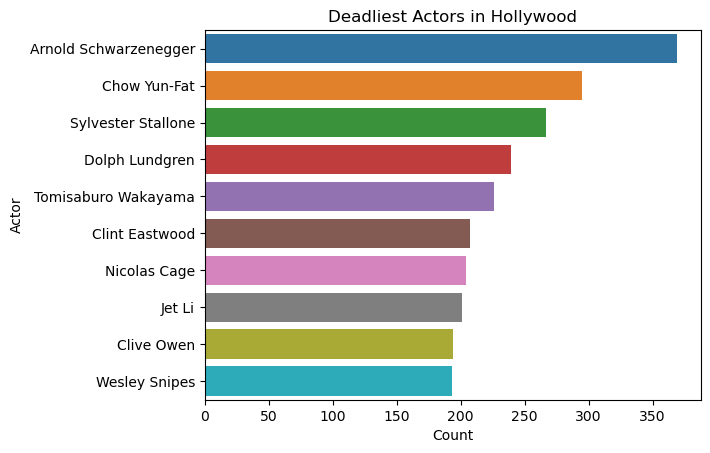

In [112]:

import seaborn as sns
q8 = sns.barplot(y = 'Actor', x = 'Count', data=sorted_actors,  orient = 'h').set_title('Deadliest Actors in Hollywood')

# Question 9

In [113]:
import pandas as pd
q9 = pd.read_csv(r'roman-emperor-reigns.csv')
q9.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


In [115]:
assassinated_count = q9.loc[q9['Cause_of_Death'].isin(['Assassinated'])].count()
possassassinated_count = q9.loc[q9['Cause_of_Death'].isin(['Possibly assassinated'])].count()
suicide_count = q9.loc[q9['Cause_of_Death'].isin(['Suicide'])].count()
died_in_captivity = q9.loc[q9['Cause_of_Death'].isin(['Died in captivity'])].count()
executed = q9.loc[q9['Cause_of_Death'].isin(['Executed'])].count()
illness = q9.loc[q9['Cause_of_Death'].isin(['Illness'])].count()
killed_in_battle = q9.loc[q9['Cause_of_Death'].isin(['Killed in battle'])].count()
natural_causes = q9.loc[q9['Cause_of_Death'].isin(['Natural causes'])].count()

q9_data = []
q9_data.append(assassinated_count[0])
q9_data.append(possassassinated_count[0])
q9_data.append(suicide_count[0])
q9_data.append(died_in_captivity[0])
q9_data.append(executed[0])
q9_data.append(illness[0])
q9_data.append(killed_in_battle[0])
q9_data.append(natural_causes[0])

labels = ['Assassinated','Possibly assassinated', 'Suicide', 'Died in captivity', 'Executed', 'Illness', 'Killed in battle', 'Natural causes']

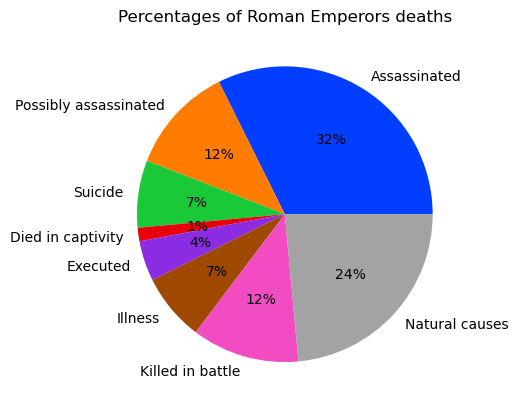

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette('bright')
plt.title('Percentages of Roman Emperors deaths')
plt.pie(q9_data, labels=labels, colors = color, autopct='%.0f%%')
plt.show()

# Question 10

In [8]:
import pandas as pd
q10 = pd.read_csv(r'arcade-revenue-vs-cs-doctorates.csv')
q10.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


In [9]:
q10.sort_values(['Year'], ascending=[False])

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
9,2009,1.734,1611
8,2008,1.803,1787
7,2007,1.654,1656
6,2006,1.601,1453
5,2005,1.435,1129
4,2004,1.307,948
3,2003,1.240,867
2,2002,1.269,809
1,2001,1.176,830
0,2000,1.196,861


In [10]:
q10.rename(columns = {'Total Arcade Revenue (billions)':'Tot_Arcade_Revenue','Computer Science Doctorates Awarded (US)':'Comp_Science_Doctorates_Awarded'}, inplace=True)
display(q10)

,Year,Tot_Arcade_Revenue,Comp_Science_Doctorates_Awarded
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


In [11]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
q10_2000 = q10[q10.Year == 2000].iloc[:1,:]
q10_2001 = q10[q10.Year == 2001].iloc[:1,:]
q10_2002 = q10[q10.Year == 2002].iloc[:1,:]
q10_2003 = q10[q10.Year == 2003].iloc[:1,:]
q10_2004 = q10[q10.Year == 2004].iloc[:1,:]
q10_2005 = q10[q10.Year == 2005].iloc[:1,:]
q10_2006 = q10[q10.Year == 2006].iloc[:1,:]
q10_2007 = q10[q10.Year == 2007].iloc[:1,:]
q10_2008 = q10[q10.Year == 2008].iloc[:1,:]
q10_2009 = q10[q10.Year == 2009].iloc[:1,:]


q10_1 =go.Scatter(x = q10_2000.Comp_Science_Doctorates_Awarded,y = q10_2000.Tot_Arcade_Revenue,mode = "markers",name = "2000",marker = dict(color = 'rgba(255, 128, 255, 0.8)'),text= q10_2000.Year)

q10_2 =go.Scatter(x = q10_2001.Comp_Science_Doctorates_Awarded,y = q10_2001.Tot_Arcade_Revenue,mode = "markers", name = "2001",marker = dict(color = 'rgba(255, 128, 2, 0.8)'),text= q10_2001.Year)

q10_3 =go.Scatter(x = q10_2002.Comp_Science_Doctorates_Awarded, y = q10_2002.Tot_Arcade_Revenue, mode = "markers", name = "2002", marker = dict(color = 'rgba(0, 255, 200, 0.8)'),text= q10_2002.Year)

q10_4 =go.Scatter(x = q10_2003.Comp_Science_Doctorates_Awarded,y = q10_2003.Tot_Arcade_Revenue,mode = "markers",name = "2003",marker = dict(color = 'rgba(25, 128, 25, 0.8)'),text= q10_2003.Year)

q10_5 =go.Scatter(x = q10_2004.Comp_Science_Doctorates_Awarded,y = q10_2004.Tot_Arcade_Revenue,mode = "markers", name = "2004",marker = dict(color = 'rgba(55, 18, 2, 0.8)'),text= q10_2004.Year)

q10_6 =go.Scatter(x = q10_2005.Comp_Science_Doctorates_Awarded, y = q10_2005.Tot_Arcade_Revenue, mode = "markers", name = "2005", marker = dict(color = 'rgba(0, 0, 0, 0.8)'),text= q10_2005.Year)

q10_7 =go.Scatter(x = q10_2006.Comp_Science_Doctorates_Awarded,y = q10_2006.Tot_Arcade_Revenue,mode = "markers",name = "2006",marker = dict(color = 'rgba(178, 34, 34, 0.8)'),text= q10_2006.Year)

q10_8 =go.Scatter(x = q10_2007.Comp_Science_Doctorates_Awarded,y = q10_2007.Tot_Arcade_Revenue,mode = "markers", name = "2007",marker = dict(color = 'rgba(255, 255, 0, 0.8)'),text= q10_2007.Year)

q10_9 =go.Scatter(x = q10_2008.Comp_Science_Doctorates_Awarded, y = q10_2008.Tot_Arcade_Revenue, mode = "markers", name = "2008", marker = dict(color = 'rgba(0, 0, 205, 0.8)'),text= q10_2008.Year)

q10_10 =go.Scatter(x = q10_2009.Comp_Science_Doctorates_Awarded,y = q10_2009.Tot_Arcade_Revenue,mode = "markers",name = "2009",marker = dict(color = 'rgba(105, 105, 105, 0.8)'),text= q10_2009.Year)


data = [q10_1, q10_2, q10_3, q10_4, q10_5, q10_6, q10_7, q10_8, q10_9, q10_10]
layout = dict(title = 'Relationship between arcade revenues and the # Computer Science PhDs awarded(US) between 2000-2009', xaxis= dict(title='Computer Science Doctorates Awarded(US)',ticklen= 5,zeroline= False),yaxis= dict(title='Total Arcade Revenue(billions)',ticklen= 5,zeroline= False))
fig = dict(data = data, layout = layout)
iplot(fig)